### Convolutional neural network (CNN). Use MNIST Fashion Dataset and create a classifier to classify fashion clothing into categories.

In [1]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D
import matplotlib.pyplot as plt

In [2]:
# Load and preprocess the data
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()
train_x, test_x = train_x / 255.0, test_x / 255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Define the model
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

C:\Python\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [5]:
# Train the model
model.fit(train_x.reshape(-1, 28, 28, 1), train_y, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 45s 28ms/step - accuracy: 0.8149 - loss: 0.5227 - val_accuracy: 0.8882 - val_loss: 0.3130
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 29ms/step - accuracy: 0.9034 - loss: 0.2755 - val_accuracy: 0.9087 - val_loss: 0.2599
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.9203 - loss: 0.2154 - val_accuracy: 0.9010 - val_loss: 0.2875
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 29ms/step - accuracy: 0.9321 - loss: 0.1810 - val_accuracy: 0.9154 - val_loss: 0.2382
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.9448 - loss: 0.1499 - val_accuracy: 0.9125 - val_loss: 0.2494


In [6]:
# Evaluate the model
loss, acc = model.evaluate(test_x.reshape(-1, 28, 28, 1), test_y)
print("Test Loss:", loss)
print("Test Accuracy:", acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9031 - loss: 0.2751
Test Loss: 0.26659059524536133
Test Accuracy: 0.9067000150680542


In [7]:
# Define labels
labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']

In [8]:
# Make predictions
predictions = model.predict(test_x[:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


In [9]:
# Get predicted label
label = labels[np.argmax(predictions)]

Predicted Label: ankle_boots


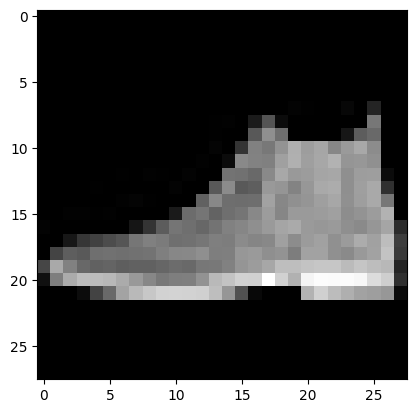

In [10]:
# Plot the image
print("Predicted Label:", label)
plt.imshow(test_x[0], cmap='gray')
plt.show()